<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [1]:
import praw
import reddit_secrets

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id=reddit_secrets.REDDIT_API_CLIENT_ID,
    client_secret=reddit_secrets.REDDIT_API_CLIENT_SECRET,
    user_agent=reddit_secrets.REDDIT_API_USER_AGENT
)

In [2]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected output you will see ar from `r/machinelearning` unless otherwise specified.

In [3]:
# YOUR CODE HERE
sub_reddit = reddit.subreddit("machinelearning")

What is the display name of the subreddit?

In [4]:
# YOUR CODE HERE
sub_reddit.display_name

'machinelearning'

<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [5]:
# YOUR CODE HERE
sub_reddit.title

'Machine Learning'

<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [6]:
# YOUR CODE HERE
sub_reddit.description[:500]

'**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**\n--------\n+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)\n--------\n+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)\n--------\n+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)\n--------\n+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict'

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [7]:
# try run this line, what do you see? press q once you are done
?sub_reddit.top 

In [10]:
# YOUR CODE HERE
for post in sub_reddit.top(limit=10):
    print(post.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [11]:
# YOUR CODE HERE
for post in sub_reddit.top(time_filter="week", limit=10):
    print(post.title)

30% of Google's Reddit Emotions Dataset is Mislabeled [D]
[R] mixed reality future — see the world through artistic lenses — made with NeRF
[N] First-Ever Course on Transformers: NOW PUBLIC
[D] Why are Corgi dogs so popular in machine learning (especially in the image generation community)?
[D] Noam Chomsky on LLMs and discussion of LeCun paper (MLST)
[D] Are there any rejected papers that ended up having significant impact in the long run?
[N] Andrej Karpathy is leaving Tesla
[R] So someone actually peer-reviewed this and thought "yeah, looks good"?
[D] How do you verify the novelty of your research?
[N] BigScience Releases their 176 Billion Parameter Open-access Multilingual Language Model


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

Ans.

I would like to extract a few more info like the number of comments a post has received, number of upvotes, and  % of upvotes. Since this is going to be a sentiment analysis task, these info kinda provide 'weight' to that sentiment.

In [13]:
# YOUR CODE HERE
for post in sub_reddit.top(time_filter="week", limit=3):
    print(post.title)
    print(f'Type: {type(post)}')
    print(f'Number of comments: {post.num_comments}')
    print(f'Number of upvotes: {post.score}')
    print(f'Percentage of upvotes: {post.upvote_ratio}')
    print('--')

30% of Google's Reddit Emotions Dataset is Mislabeled [D]
Type: <class 'praw.models.reddit.submission.Submission'>
Number of comments: 134
Number of upvotes: 864
Percentage of upvotes: 0.98
--
[R] mixed reality future — see the world through artistic lenses — made with NeRF
Type: <class 'praw.models.reddit.submission.Submission'>
Number of comments: 15
Number of upvotes: 351
Percentage of upvotes: 0.96
--
[N] First-Ever Course on Transformers: NOW PUBLIC
Type: <class 'praw.models.reddit.submission.Submission'>
Number of comments: 37
Number of upvotes: 343
Percentage of upvotes: 0.92
--


💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

Ans.

1. Knowing the author (of a post) may cause some ethical challenge, but will be essential to know bias!
2. How this data will be used may cause some ethical challenge (https://online.hbs.edu/blog/post/data-ethics)

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [14]:
%%time
from praw.models import MoreComments

# YOUR COMMENT HERE
# a list to collect the top-level comments (and not comment to the comment, etc.)
top_comments = []

# YOUR COMMENT HERE
# looping through the top 10 subreddits
for submission in sub_reddit.top(limit=10):
    # YOUR COMMENT HERE
    # loop through all the comments in a subreddit
    for top_level_comment in submission.comments:
        # YOUR COMMENT HERE
        # skip if the comment is not a top-level comment
        if isinstance(top_level_comment, MoreComments):
            continue
        # YOUR COMMENT HERE
        # append otherwise
        top_comments.append(top_level_comment.body)

CPU times: user 424 ms, sys: 107 ms, total: 531 ms
Wall time: 1min 54s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [15]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
print(f'No. of comments: {len(top_comments)}\n')
for comment in top_comments[:5]:
    print(comment)
    print('--')

No. of comments: 739

Twitter thread: [https://twitter.com/cyrildiagne/status/1259441154606669824](https://twitter.com/cyrildiagne/status/1259441154606669824)

Code: [https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard](https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard)

Background removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [https://github.com/NathanUA/U-2-Net](https://github.com/NathanUA/U-2-Net)

**/!\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [https://arcopypaste.app](https://arcopypaste.app)  !
--
Simple yet very useful. Thank you for sharing the code.
--
The future 🤯
--
Ohh the nightmare of making this into a stable product... Enough to drive you mad just thinking about it
--
Almost guaranteed, Apple will copy your idea in 3, 2, 1....
--


In [17]:
import random

[random.choice(top_comments) for i in range(3)]

['Harry: you always can',
 'Very nice, have to say I caught myself bobbing my head to the music too... followed you on Instagram. Thanks for sharing.',
 'I think my robot will punish other people when Im procrastinating.']

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

Ans.

1. Data is unclean (presense of un-tokenizable symbols like "/!\\" (emojis are fine)
2. Some comments are just links - so we need to extract the meaning from those link?
3. But comments can also help amplify the sentiment of a post (which can be a useful thing)!

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [18]:
# YOUR CODE HERE
sub_reddit_tsla = reddit.subreddit("TSLA")

top_comments_tsla = []
for submission in sub_reddit_tsla.top(time_filter="year", limit=10):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        top_comments_tsla.append(top_level_comment.body)

In [19]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

158

In [21]:
[random.choice(top_comments_tsla) for i in range(3)]

['I sold all of my Tesla and bought in on GME at $275.00 all in',
 'I’m %70 TSLA',
 'Congrats!!']

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

Ans.
In general TSLA comments are more polarized I think.

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [22]:
from transformers import pipeline  # << YOUR CODE HERE

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [23]:
sentiment_model = pipeline("sentiment-analysis")  # << YOUR CODE HERE

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [24]:
comment = random.choice(top_comments_tsla)

In [25]:
comment

'Don’t ever go all in on any investment. Just when you think you have investing figured out, it will remind you who is in charge and why so many lost money investing. Diversification is the key to wealth and investing. I wouldn’t invest all my eggs in any one basket.'

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [27]:
sentiment = sentiment_model(comment)  # << YOUR CODE HERE 
print(f'Type: {type(sentiment)}')
print(sentiment)

Type: <class 'list'>
[{'label': 'POSITIVE', 'score': 0.9967129230499268}]


What is the type of the output `sentiment`?

```
YOUR ANSWER HERE
```

*A. <class 'list'>*

In [28]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: Don’t ever go all in on any investment. Just when you think you have investing figured out, it will remind you who is in charge and why so many lost money investing. Diversification is the key to wealth and investing. I wouldn’t invest all my eggs in any one basket.
Predicted Label is POSITIVE and the score is 0.997


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

Ans.
How confident the model is about that predicted sentiment label! Score of close to 1 is absolute confidence, 0.5 would be so-so confident, close to 0 is not that confident.

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [29]:
%%writefile top_tlsa_comment_sentiment.py

import reddit_secrets
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=reddit_secrets.REDDIT_API_CLIENT_ID,        
        client_secret=reddit_secrets.REDDIT_API_CLIENT_SECRET,
        user_agent=reddit_secrets.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)  # << YOUR CODE HERE
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis")  # << YOUR CODE HERE
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit(display_name='TSLA')  # << YOUR CODE HERE
    comments = get_comments(subreddit)
    comment = random.choice(comments)  # << YOUR CODE HERE
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Writing top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [31]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
The comment: TSLA is a promising stock, as long as it keeps on promising.
Predicted Label is POSITIVE and the score is 0.999


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

Ans:

1. Yes, the TSLA subreddit seems to be active, with 0-4 posts/day in the last ten days
2. In the life of this subreddit (576 days), there are average 1.7 posts/day
3. I computed this info using the `subreddit.new` (pls see below for the code)

In [49]:
?sub_reddit.new

In [66]:
from datetime import datetime, timezone

print(f'subreddit: {sub_reddit_tsla.display_name}')
now = datetime.now(timezone.utc).timestamp()  # time in seconds since Unix epoch
day = 24 * 60 * 60  # how many seconds in 1 day

# post_stats is a list of tuples for all the posts, where tuple is (how many days back a post was created, post author)
post_stats = [(int((now-post.created_utc)//day), post.author.name if post.author else None) for post in sub_reddit_tsla.new(limit=None)]
print(f'Total no. of posts: {len(post_stats)}')

subreddit: TSLA
Total no. of posts: 996


In [86]:
print(f'# of days back\tusername who posted')
for stat in post_stats[:10]:
    print(f'{stat[0]}\t\t{stat[1]}')

# of days back	username who posted
0		wewewawa
0		weirdlittleflute
0		wewewawa
1		AdmirableActuator
2		StocksWithCamden
2		ju-ju2020
2		ju-ju2020
2		wewewawa
4		wewewawa
5		Frequent_Ad_7439


In [131]:
from collections import Counter

count_posts_on_day = Counter([day for day, author in post_stats])
count_posts_per_author = Counter([author for day, author in post_stats])

print('No. of posts in the last ten days')
print(f'# of days back\t# of posts')
for i in range(10):
    print(f'{i}\t\t{count_posts_on_day[i]}')

max_days = max([day for day, author in post_stats])
print(f'\n\nNo. of days since the beginning of this subreddit: {max_days}')
print(f'Average no. of posts per day: {len(post_stats)/max_days:.1f}')

No. of posts in the last ten days
# of days back	# of posts
0		3
1		1
2		4
3		0
4		1
5		2
6		1
7		3
8		0
9		2


No. of days since the beginning of this subreddit: 576
Average no. of posts per day: 1.7


💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

Ans:

1. Seems like a small % of users are very active (around 2% of users posted 23% of the content)!
2. This may cause the sentiment to be biased towards what those small % of users think

Please see the computation below!

In [128]:
distribution = [(user, count) for user, count in count_posts_per_author.items() if user != None]
distribution.sort(key = lambda k: k[1], reverse=True)

posts_count = 0
total_users = len(distribution)  # not including the None users
total_posts = len(post_stats) - count_posts_per_author[None]  # Excluding posts by None useres
print(f'Total no. of users: {total_users}')
print(f'Total no. of posts: {total_posts}')
x_pct_users, y_pct_posts = [], []

print(f'\ntop posters (%)\t\tposts %')
for i, (user, count) in enumerate(distribution):
    posts_count += count
    pct_users = (i+1) * 100 / total_users
    pct_posts = posts_count * 100 / total_posts
    x_pct_users.append(pct_users)
    y_pct_posts.append(pct_posts)
    print(f'{pct_users:.4f}\t\t\t{pct_posts:.2f}')
    

Total no. of users: 481
Total no. of posts: 976

top posters (%)		posts %
0.2079			5.43
0.4158			10.66
0.6237			13.01
0.8316			14.65
1.0395			16.19
1.2474			17.62
1.4553			19.06
1.6632			20.39
1.8711			21.62
2.0790			22.75
2.2869			23.87
2.4948			24.90
2.7027			25.82
2.9106			26.74
3.1185			27.66
3.3264			28.59
3.5343			29.51
3.7422			30.33
3.9501			31.15
4.1580			31.86
4.3659			32.48
4.5738			33.09
4.7817			33.71
4.9896			34.32
5.1975			34.94
5.4054			35.55
5.6133			36.17
5.8212			36.78
6.0291			37.40
6.2370			38.01
6.4449			38.52
6.6528			39.04
6.8607			39.55
7.0686			40.06
7.2765			40.57
7.4844			41.09
7.6923			41.50
7.9002			41.91
8.1081			42.32
8.3160			42.73
8.5239			43.14
8.7318			43.44
8.9397			43.75
9.1476			44.06
9.3555			44.36
9.5634			44.67
9.7713			44.98
9.9792			45.29
10.1871			45.59
10.3950			45.90
10.6029			46.21
10.8108			46.52
11.0187			46.82
11.2266			47.13
11.4345			47.44
11.6424			47.75
11.8503			48.05
12.0582			48.36
12.2661			48.67
12.4740			48.98
12.6819			49.28

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'posts %')

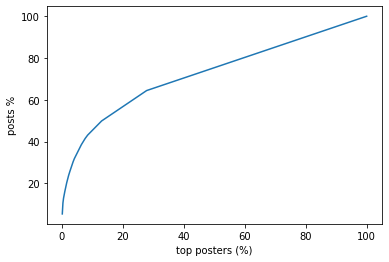

In [130]:
plt.plot(x_pct_users, y_pct_posts)
plt.xlabel('top posters (%)')
plt.ylabel('posts %')